In [106]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [107]:
pd.core.common.is_list_like = pd.api.types.is_list_like

In [108]:
import pandas_datareader.data as web
from pandas_datareader import data
import datetime

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 3, 17)

SP500 = data.DataReader(['sp500'], 'fred', start, end)

In [109]:
i =0

list_date = []
list_price = []


for index, row in SP500.iterrows():
    index = index.date()
    price = row['sp500']
    
    if(math.isnan(price)):
        continue
    else:
        list_date.append(index)
        list_price.append(price)
        #print(f'# {i} - {index} - price : {price}')

    #print(f'# {i} - {index} - price : {price}')
    i = i + 1

df_sp500 = pd.DataFrame()
df_sp500['date_sp'] = list_date
df_sp500['SP500'] = list_price
df_sp500

,date_sp,SP500
0,2020-01-02,3257.85
1,2020-01-03,3234.85
2,2020-01-06,3246.28
3,2020-01-07,3237.18
4,2020-01-08,3253.05
...,...,...
552,2022-03-11,4204.31
553,2022-03-14,4173.11
554,2022-03-15,4262.45
555,2022-03-16,4357.86


In [110]:
import requests

url = 'https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-12-30'
price_btc_history = requests.get(f'{url}').json()
price_btc_history = price_btc_history['bpi'] # parse

In [111]:
price_BTC = pd.DataFrame(price_btc_history.items(), columns=['date_btc', 'BTCUSD'])
price_BTC

,date_btc,BTCUSD
0,2020-01-01,7188.4633
1,2020-01-02,6961.5683
2,2020-01-03,7346.5800
3,2020-01-04,7355.8550
4,2020-01-05,7356.3117
...,...,...
360,2020-12-26,26445.9500
361,2020-12-27,26248.2767
362,2020-12-28,27041.8667
363,2020-12-29,27353.9783


In [112]:
SP500BTC = price_BTC.merge(df_sp500, how='inner',right_index = True, left_index=True)
SP500BTC

,date_btc,BTCUSD,date_sp,SP500
0,2020-01-01,7188.4633,2020-01-02,3257.85
1,2020-01-02,6961.5683,2020-01-03,3234.85
2,2020-01-03,7346.5800,2020-01-06,3246.28
3,2020-01-04,7355.8550,2020-01-07,3237.18
4,2020-01-05,7356.3117,2020-01-08,3253.05
...,...,...,...,...
360,2020-12-26,26445.9500,2021-06-08,4227.26
361,2020-12-27,26248.2767,2021-06-09,4219.55
362,2020-12-28,27041.8667,2021-06-10,4239.18
363,2020-12-29,27353.9783,2021-06-11,4247.44


In [113]:
correlation = SP500BTC[['SP500','BTCUSD']].corr()
print(correlation)

           SP500    BTCUSD
SP500   1.000000  0.780556
BTCUSD  0.780556  1.000000


/tmp/ipykernel_342362/3230897868.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

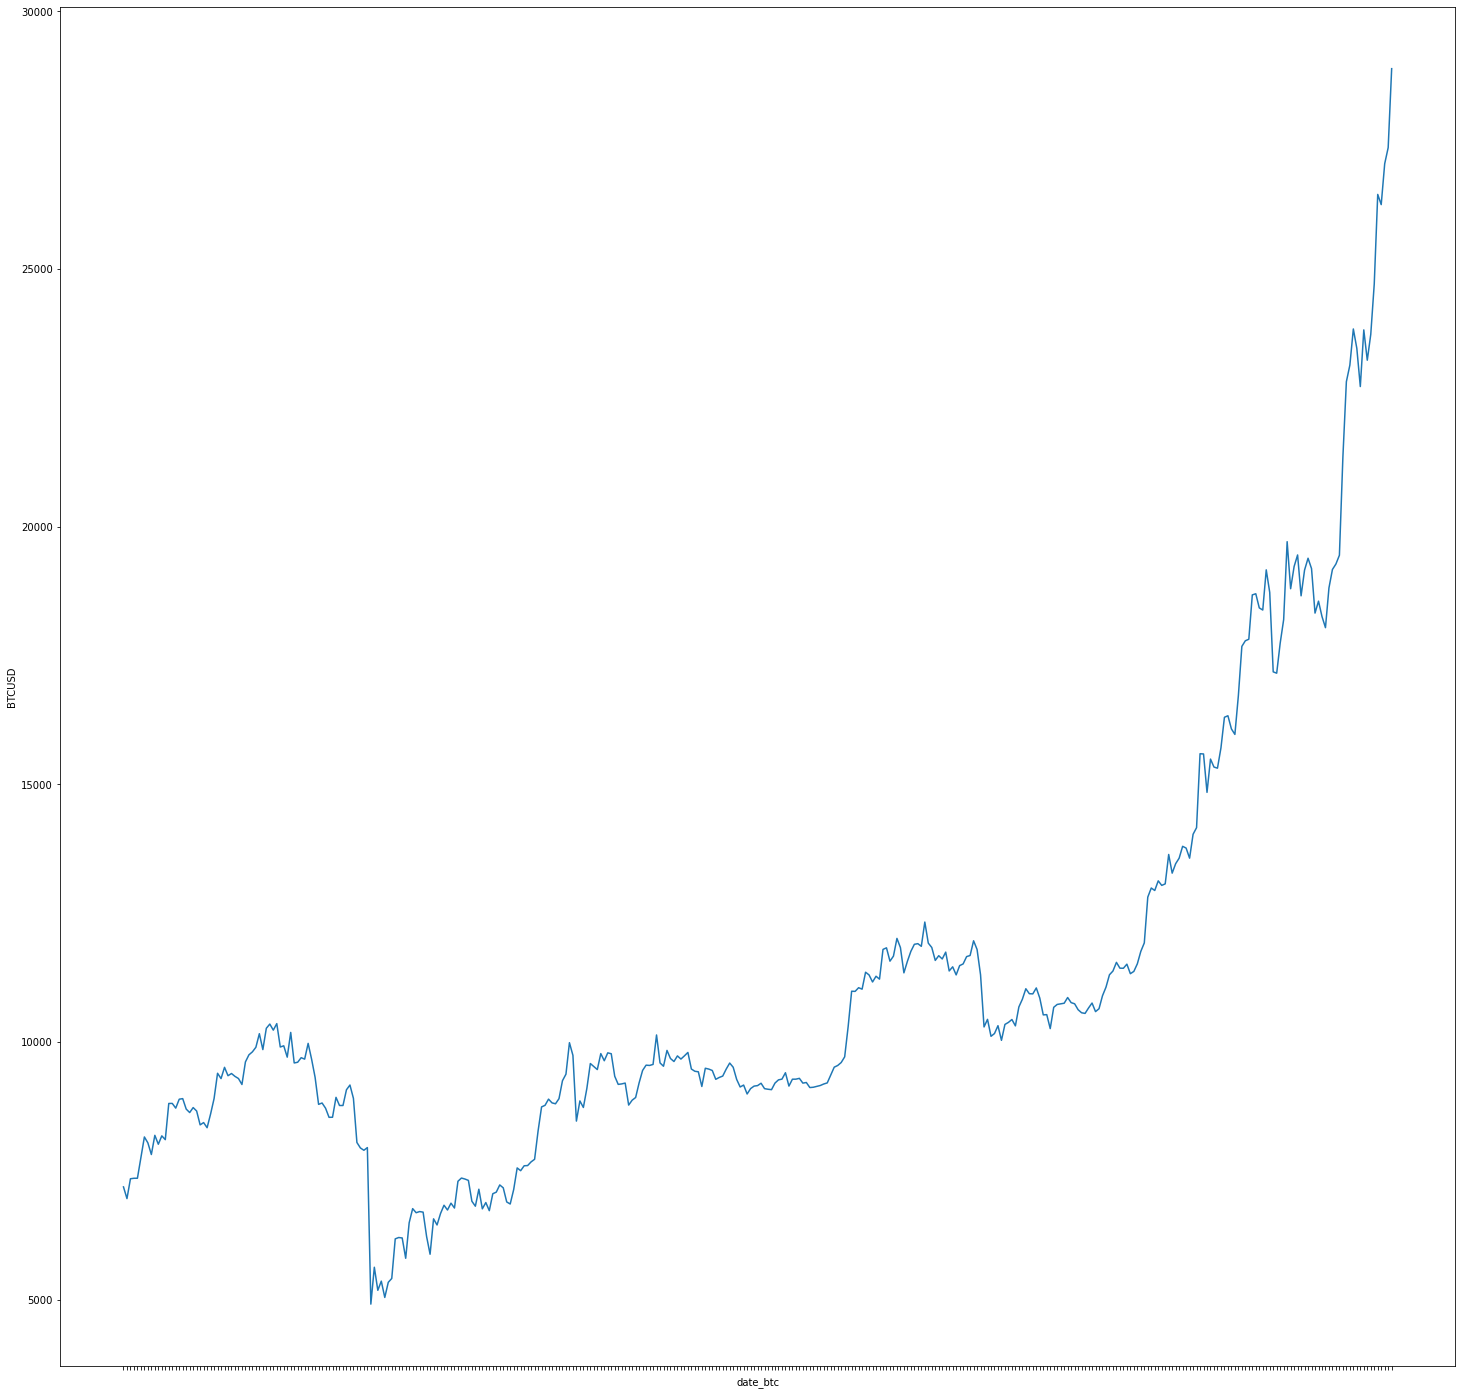

In [114]:
plt.figure(figsize = (25,25))
ax = sns.lineplot(data=SP500BTC, x='date_btc', y='BTCUSD')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)